In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 1.6 Algoritmos de Otimização

No último notebook, nós programos nossa primeira rede neural. Além disso, vimos também a fórmula de atualização dos pesos. Se você não lembra, os pesos e os bias foram atualizados da seguinte forma:

$$w_i = w_i - \lambda * \partial w $$

$$b_i = b_i - \lambda * \partial b$$

Mas, você já parou pra pensar da onde vêm essas fórmulas? Além disso, será que existem melhores formas de atualizar os pesos? É isso que vamos ver nesse notebook.

# Stochastic Gradient Descent (SGD) 

A fórmula que vimos acima, representa o **Gradiente Estocástico de Descida.** E o que significam esses termos todos? Vamos ver:

- **Estocástico**: significa que os pesos são atualizados individualmente. Isto é, nós vamos passar uma amostra pro vez pra rede, que vai calcular o erro e, então, atualizar os pesos. Quando a atualização de pesos é feita para todas as amostras de uma vez, temos o **Gradiente Descendente** apenas. Da mesma forma, quando utilizamos mini-batchs, temos o **Mini-batch Gradient Descent**.
- **Gradiente**: na matemática, o gradiente é nada mais nada menos que um vetor de derivadas. Por exemplo, se você tem duas variáveis $x$ e $y$ e calcula os gradientes $\partial x$ $\partial y$, o (*vetor*) gradiente será $[\partial x, \partial y]$.
- **Descendente**: para quem não lembra, a derivada de uma função nos diz se a função cresce ou decresce naquele determina ponto. Como o objetivo das redes neurais é sempre diminuir um função de custo (usando derivadas), nós iremos pegar o negativo dessa derivada - por isso o sinal de menos na fórmula de atualização dos pesos.

Agora, que a gente já sabe o que significa o SGD, bora ver ele em ação? Vamos tomar como exemplo, uma função quadrática ($y = x^2 - 25$):

(-50, 79.9994898479747)

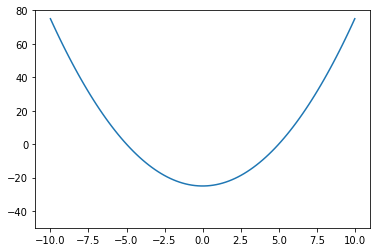

In [2]:
def f(x):
    return x ** 2 - 25

x = np.linspace(-10, 10, num=100)
y = f(x)

plt.plot(x, y)
plt.ylim(-50)

Imagine a função acima como uma função de custo quadrática que queremos minimar (por exemplo, a MSE). **E como minimizar essa função? Fácil: vamos utilizar o SGD!**.

Olhando pra fórmula do SGD, podemos minimizar o nosso $x$ da seguinte forma:

$x_i = x_i - \lambda * \partial x$

A primeira coisa que vamos precisar é calcular a derivada de $x$ ($\partial x$). Sendo $y = x^2 - 25$, a derivada em relação a $x$ é simplesmente $dx = 2*x$. Portanto, o SGD aplicado em $x$ se tornaria:

$x_i = x_i - \lambda * 2x$

Mas, o que é o $\lambda$ dessa fórmula. O $\lambda$, também conhecido como **taxa de aprendizado** ou *learning rate* é o que vai representar o *"passo"* da nossa atualização de $x$. Vamos ver o efeito dele na prática?

In [3]:
def f(x, derivada=False):
    if derivada:
        return 2 * x
    return x ** 2 - 25

def minimize_x(f, x, x0, n_passos, taxa_aprendizagem):
    y = f(x)
    
    new_x = x0
    x_ = []
    y_ = []
    for i in range(n_passos):
        new_x = new_x - taxa_aprendizagem * f(new_x, derivada=True) 
        new_y = f(new_x)

        x_.append(new_x)
        y_.append(new_y)

    plt.plot(x, y)
    plt.plot(x_, y_, color='red', marker='o')
    plt.ylim(-50)

In [4]:
x = np.linspace(-10, 10, num=100)

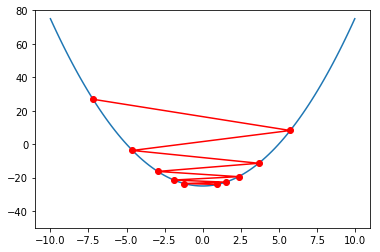

In [5]:
minimize_x(f, x, x0=9, n_passos=10, taxa_aprendizagem=0.9)

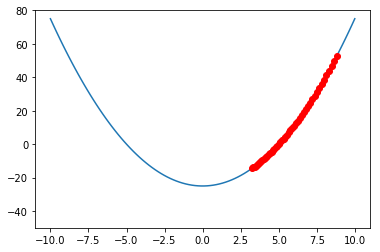

In [6]:
minimize_x(f, x, x0=9, n_passos=50, taxa_aprendizagem=0.01)

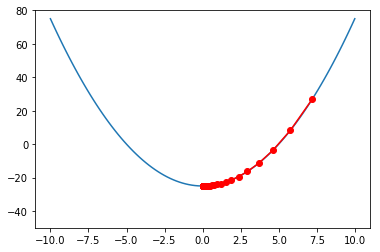

In [7]:
minimize_x(f, x, x0=9, n_passos=50, taxa_aprendizagem=0.1)

Repare que, quando $\lambda$ é muito alto (no primeiro caso, $\lambda=0.9$), a minimização da nossa função torna-se aleatória. Por outro lado, quando $\lambda$ é muito pequena (como no caso em que $\lambda=0.01$), a nossa função demora muito pra convergir. Repare que, no último caso (quando $\lambda=0.1$), a nossa função foi minimizada em apenas 50 passos.

A melhor maneira de pensar na taxa de aprendizagem é lembrar da **analogia do alpinista cego**. Imagine que você está numa montanha de olhos vendados e deseja chegar na parte de baixo da montanha. Se você der passos muitos grandes ($\lambda$ alto), você pode acabar caindo num precipício. Por outro lado, se der passos muito pequenos, você vai levar uma eternidade pra chegar na base da montanha.

# Momentum 

# Nesterov

# RMSProp 

# Adaptive Momentum (Adam)

<img src='https://cdn-images-1.medium.com/max/1600/1*SjtKOauOXFVjWRR7iCtHiA.gif' width=400>